In [3]:
import json

In [4]:
# User Input
################################################

working_dir = '/Users/julianchu/Desktop/new_series'
config_file = 'character_config.json'

scenes_to_create = ['scene_1', 'scene_2', 'scene_3']


################################################

with open(f'{working_dir}/{config_file}', 'r') as f:
    character_config = json.load(f)
character_config


{'characters': {'mdg4_claire': {'name': 'Claire',
   'description': "A creative and determined woman in her late 20s with fair skin, wavy auburn hair often tied back in a loose ponytail, and expressive green eyes. She is usually dressed in a floral apron dusted with flour over casual sweaters and jeans, pairing practicality with charm. Claire's warm smile belies her frazzled energy as she juggles her struggling business and personal dilemmas.",
   'trigger_word': 'mdg4_claire',
   'finetune': True},
  'ikzg_ryan': {'name': 'Ryan',
   'description': "A laid-back and supportive man in his early 30s with a lanky but athletic build. He has messy dark brown hair, warm hazel eyes, and a perpetual five o'clock shadow. Ryan's casual wardrobe of flannels, jeans, and sneakers reflects his easygoing personality. He often carries a thermos of coffee or a donut, ready with a quick-witted remark and a helping hand.",
   'trigger_word': 'ikzg_ryan',
   'finetune': False}},
 'style': 'A Japanese shone

In [6]:
import os

# Create scenes directory if it doesn't exist
scenes_dir = os.path.join(working_dir, 'scenes')
if not os.path.exists(scenes_dir):
    os.makedirs(scenes_dir)
    print(f"Created scenes directory at {scenes_dir}")

# Create individual scene directories if they don't exist
for scene in scenes_to_create:
    scene_dir = os.path.join(scenes_dir, scene)
    if not os.path.exists(scene_dir):
        os.makedirs(scene_dir)
        print(f"Created directory for {scene}")
    else:
        print(f"Directory for {scene} already exists")


Created scenes directory at /Users/julianchu/Desktop/new_series/scenes
Created directory for scene_1
Created directory for scene_2
Created directory for scene_3


Created character_shots directory for scene_1

Processing scene_1...
### 1. Setting

The scene is set outside "Petals & Pies," a quaint and charming bakery that exudes a warm, inviting atmosphere. The afternoon sun casts a golden hue over the scene, highlighting the vibrant colors of the storefront. The bakery's exterior is painted in a soft pastel pink, with white trim around the windows and door, giving it a nostalgic, small-town feel. A striped awning in shades of mint green and white provides shade over the entrance, fluttering gently in the breeze. The sidewalk is lined with potted plants, their lush green leaves adding a touch of nature to the urban setting. The sky is a clear, bright blue, with a few fluffy white clouds lazily drifting by. The overall ambiance is one of warmth and community, contrasting sharply with the sleek, modern presence of Logan's sports car.

### 2. Character Shots

**Claire's Shot:**

In Claire's close-up shot, she stands resolute in front of the bakery,

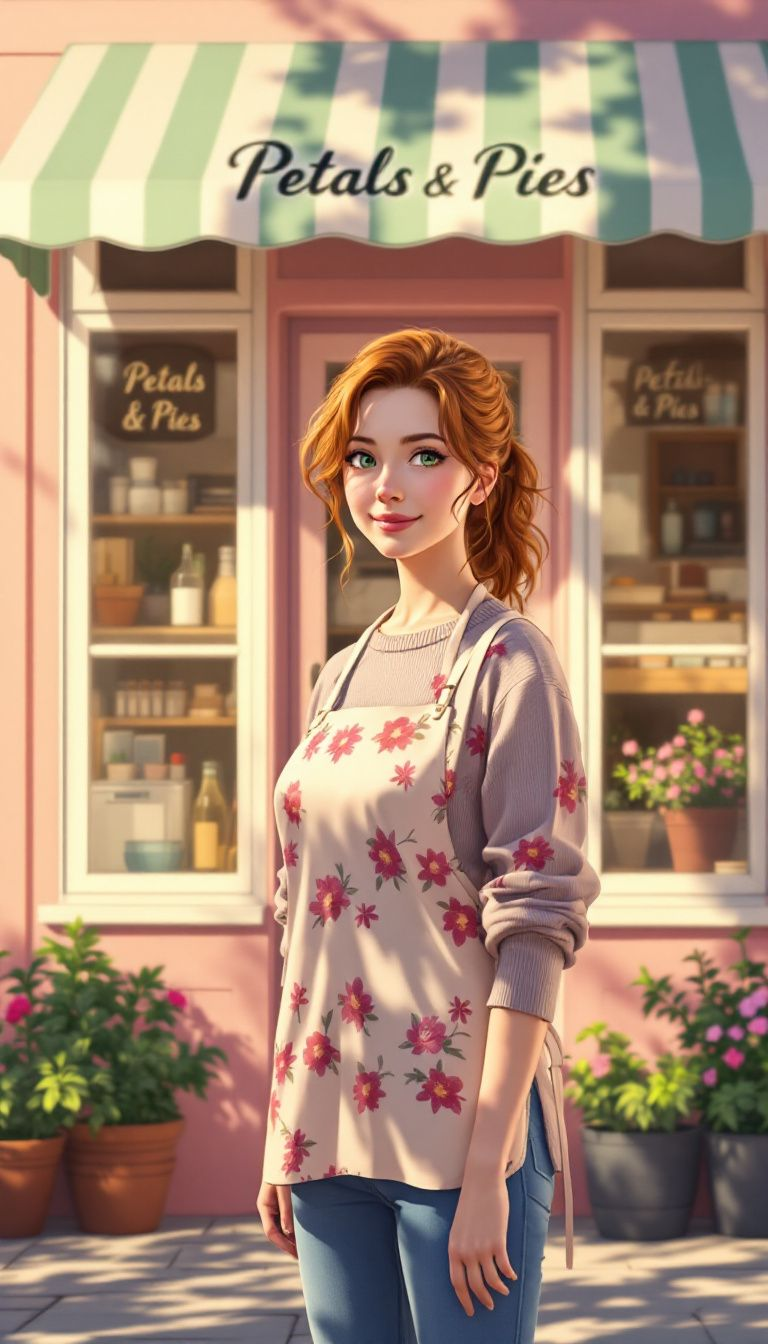

ikzg_ryan : A Japanese shonen anime shot of ikzg_ryan's shot captures him standing casually with a bag of groceries. The background features the pastel pink facade of 'Petals & Pies,' with white-trimmed windows and the mint green and white striped awning casting a gentle shadow over the entrance. Potted plants along the sidewalk add a vibrant touch of green, complementing the warm, golden light of the afternoon sun. The clear blue sky and fluffy white clouds enhance the inviting atmosphere.. The character is A laid-back and supportive man in his early 30s with a lanky but athletic build. He has messy dark brown hair, warm hazel eyes, and a perpetual five o'clock shadow. Ryan's casual wardrobe of flannels, jeans, and sneakers reflects his easygoing personality. He often carries a thermos of coffee or a donut, ready with a quick-witted remark and a helping hand.
using single model
output is not a list


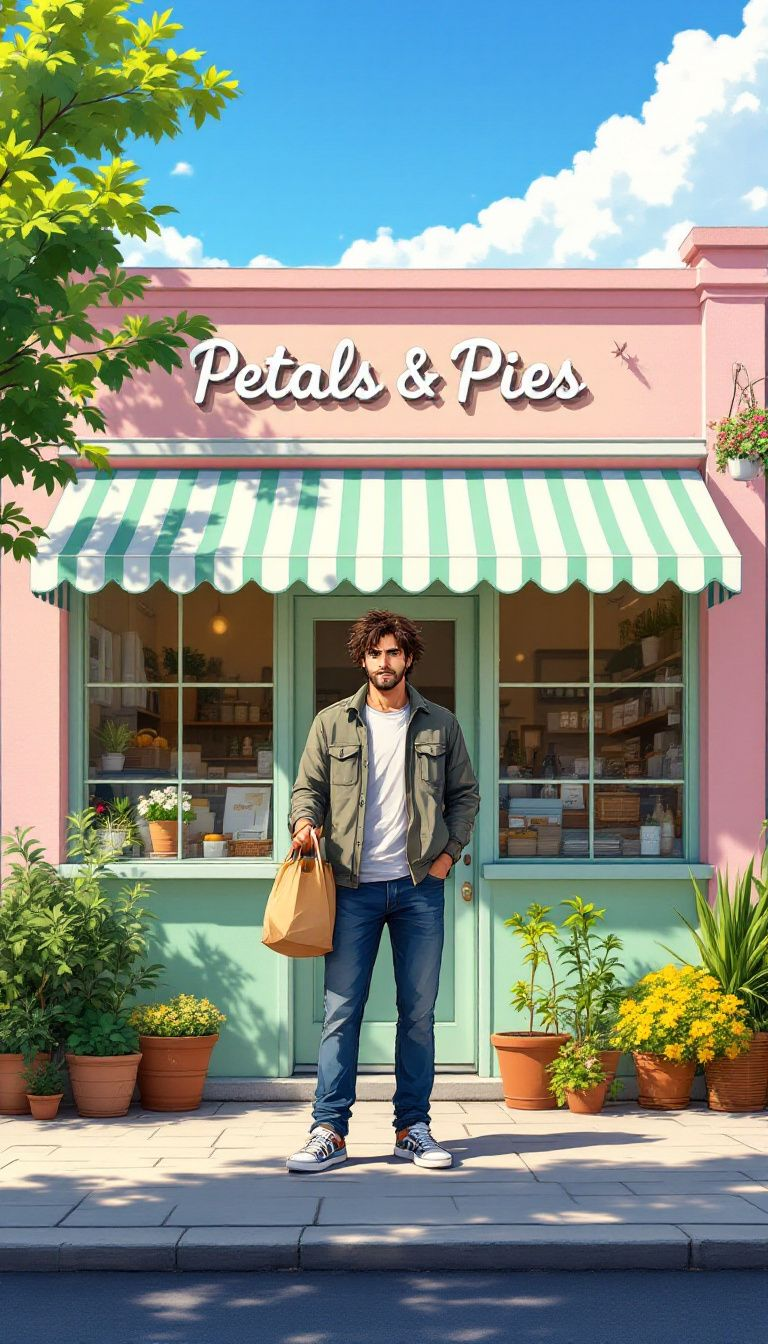

Created character_shots directory for scene_2


FileNotFoundError: [Errno 2] No such file or directory: '/Users/julianchu/Desktop/new_series/scenes/scene_2/script.txt'

In [7]:
from scene_creation import generate_character_shots

# Process each scene
for scene in scenes_to_create:
    try:
        # Load the script for this scene
        script_path = os.path.join(working_dir, 'scenes', scene, 'script.txt')
        
        # Create character_shots directory if it doesn't exist
        char_shots_dir = os.path.join(working_dir, 'scenes', scene, 'character_shots')
        if not os.path.exists(char_shots_dir):
            os.makedirs(char_shots_dir)
            print(f"Created character_shots directory for {scene}")
        
        # Read the script
        with open(script_path, 'r') as f:
            script = f.read()
        
        print(f"\nProcessing {scene}...")
        # Generate character shots using the helper function
        generate_character_shots(script, working_dir, scene, character_config)
        
    except Exception as e:
        print(f"Error processing {scene}: {str(e)}")
        continue


In [9]:
from storyboard_creation import script_to_storyboard

# Process each scene
for scene in scenes_to_create:
    try:
        # Load the script for this scene
        script_path = os.path.join(working_dir, 'scenes', scene, 'script.txt')
        
        print(f"\nCreating storyboard for {scene}...")
        
        # Read the script
        with open(script_path, 'r') as f:
            script = f.read()
        
        # Convert script to storyboard DataFrame
        storyboard_df = script_to_storyboard(script)

        display(storyboard_df)
        
        # Save storyboard to CSV
        storyboard_path = os.path.join(working_dir, 'scenes', scene, 'storyboard.csv')
        storyboard_df.to_csv(storyboard_path, index=False)
        print(f"Saved storyboard to {storyboard_path}")
        
    except Exception as e:
        print(f"Error processing {scene}: {str(e)}")
        continue



Creating storyboard for scene_1...


,character,actions,speaking_character,speech
0,LOGAN,the character Pointing at a glossy blueprint s...,LOGAN,"This place has charm, Claire. But charm doesn’..."
1,CLAIRE,"the character Indignant, talking to the viewer",CLAIRE,"Oh, sorry, I didn’t realize the world needed m..."
2,LOGAN,"the character Grinning, talking to the viewer",LOGAN,People love balconies. It’s where they go to p...
3,RYAN,the character Appears behind CLAIRE with a bag...,RYAN,"Nice ride. Does it come with a soul, or is tha..."
4,CLAIRE,"the character Under her breath, talking to the...",CLAIRE,Let me guess—he’d charge extra.
5,LOGAN,the character Smirks but clearly isn’t used to...,LOGAN,Think it over. The clock’s ticking.
6,RYAN,the character talking to the viewer,RYAN,"Yeah, so’s your car alarm."
7,LOGAN,"Turns to see a LOCAL KID messing with his car,...",,
8,CLAIRE,Exchanges a victorious look with RYAN.,,
9,RYAN,Exchanges a victorious look with CLAIRE.,,


Saved storyboard to /Users/julianchu/Desktop/new_series/scenes/scene_1/storyboard.csv

Creating storyboard for scene_2...


FileNotFoundError: [Errno 2] No such file or directory: '/Users/julianchu/Desktop/new_series/scenes/scene_2/script.txt'